#### Mofoluwasho Kayode
#### Redesign of Florence Nightingale's Coxcomb Diagram

#### Introduction
Florence Nightingale's Coxcomb Diagram was titled "Diagram of the Causes of Mortality in the Army in the East". She historically used data and visualization to improve the healthcare of soldiers during the Crimean War in the 19th century.

![Florence Nightingale](Florence_Nightingale.png)
![Coxcomb Diagram](Nightingale_Diagram.jpg)



#### First Iteration 

Pandas, plotly.graph_objects and make_subplots from plotly.subplots are employed for the redesign. The data file is imported and the data structure reviewed. The data is split into 2 periods to create 2 images side by side similar to the original design done by Nightingale. The colours to be used are also defined and made simlar to the colours used by Nightingale. The redesign includes an interactive legend which gives the different displays for Disease, Wounds and Other illnesses when toggled. This allows for more comparison across the different disease causes and time periods.



,Unnamed: 0,Date,Month,Year,Army,Disease,Wounds,Other,Disease.rate,Wounds.rate,Other.rate
0,1,1854-04-01,Apr,1854,8571,1,0,5,1.4,0.0,7.0
1,2,1854-05-01,May,1854,23333,12,0,9,6.2,0.0,4.6
2,3,1854-06-01,Jun,1854,28333,11,0,6,4.7,0.0,2.5
3,4,1854-07-01,Jul,1854,28722,359,0,23,150.0,0.0,9.6
4,5,1854-08-01,Aug,1854,30246,828,1,30,328.5,0.4,11.9


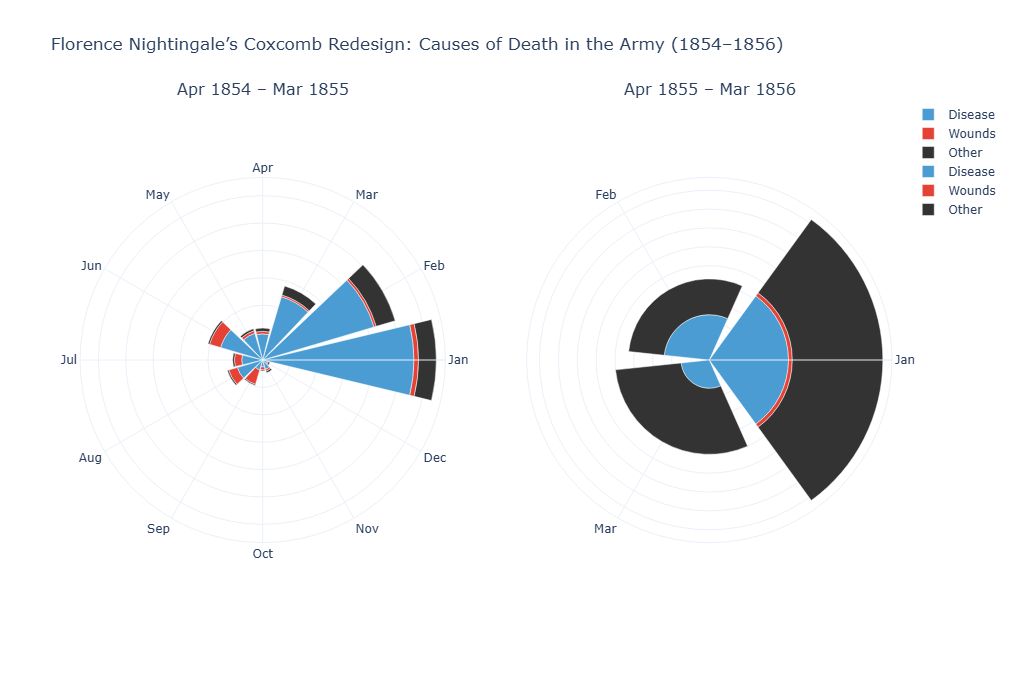

In [71]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = pd.read_csv("nightingale.csv")
display(df.head())

df_1854_55 = df[df['Year'] == 1855]   # April 1854 – March 1855
df_1855_56 = df[df['Year'] == 1856]   # April 1855 – March 1856

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type': 'polar'}, {'type': 'polar'}]],
                    subplot_titles=("Apr 1854 – Mar 1855", "Apr 1855 – Mar 1856"))

colors = {"Disease": "#4B9CD3", "Wounds": "#E34234", "Other": "#333333"}

for cause in ["Disease", "Wounds", "Other"]:
    fig.add_trace(go.Barpolar(
        r=df_1854_55[cause],
        theta=df_1854_55['Month'],
        name=cause,
        marker_color=colors[cause],
        subplot="polar"
    ), 1, 1)

for cause in ["Disease", "Wounds", "Other"]:
    fig.add_trace(go.Barpolar(
        r=df_1855_56[cause],
        theta=df_1855_56['Month'],
        name=cause,
        marker_color=colors[cause],
        subplot="polar2"
    ), 1, 2)

fig.update_layout(
    title_text="Florence Nightingale’s Coxcomb Redesign: Causes of Death in the Army (1854–1856)",
    template="plotly_white",
    showlegend=True,
    polar=dict(radialaxis=dict(showticklabels=False, ticks='')),
    polar2=dict(radialaxis=dict(showticklabels=False, ticks='')),
    height=700
)

fig.show()




#### Second Iteration 

The two diagrams are replaced by one diagram with animation across the years using a slider and play/pause buttons to make the redesign more interactive and show the disease status every year. This is a twist to the original design enabling the data to be revealed by a calender year to year transition. 



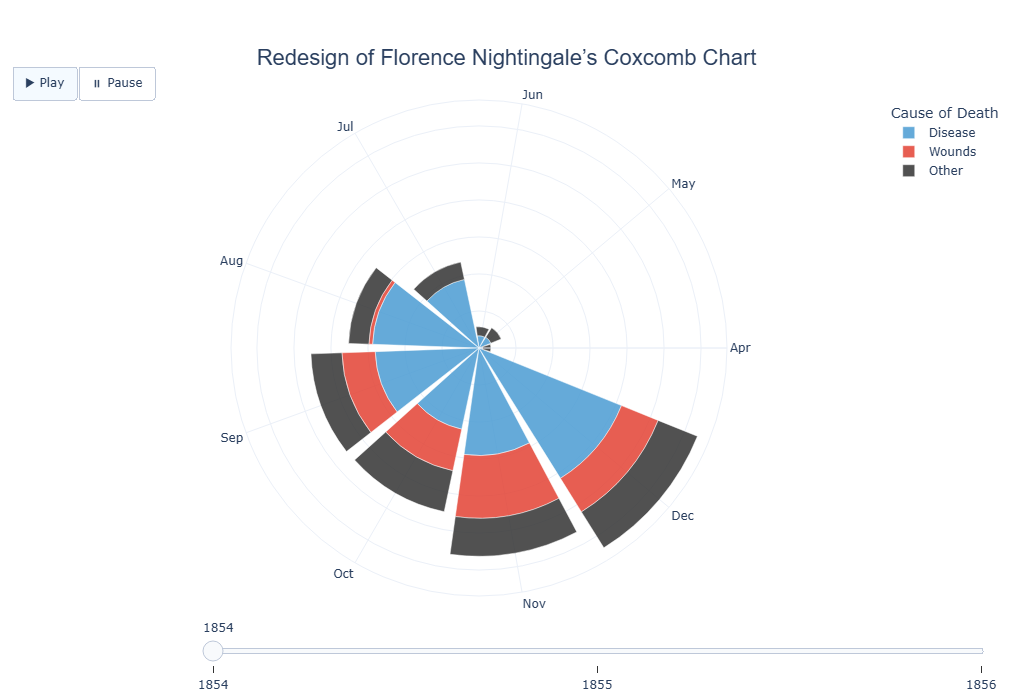

In [67]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

df = pd.read_csv("nightingale.csv")
df = df[['Month', 'Year', 'Disease', 'Wounds', 'Other']]

for cause in ["Disease", "Wounds", "Other"]:
    df[cause + "_radius"] = np.sqrt(df[cause])

colors = {"Disease": "#4B9CD3", "Wounds": "#E34234", "Other": "#333333"}

fig = go.Figure()
years = sorted(df['Year'].unique())

for cause in ["Disease", "Wounds", "Other"]:
    subset = df[df['Year'] == years[0]]
    fig.add_trace(go.Barpolar(
        r=subset[cause + "_radius"],
        theta=subset['Month'],
        name=cause,
        marker_color=colors[cause],
        opacity=0.85,
        hovertemplate="%{theta}<br>%{r**2:.0f} deaths<extra></extra>"
    ))

frames = []
for year in years:
    subset = df[df['Year'] == year]
    frame_data = []
    for cause in ["Disease", "Wounds", "Other"]:
        frame_data.append(go.Barpolar(
            r=subset[cause + "_radius"],
            theta=subset['Month'],
            marker_color=colors[cause],
            opacity=0.85
        ))
   
    frames.append(go.Frame(data=frame_data, name=str(year), layout=go.Layout(annotations=frame_annotations)))

fig.update(frames=frames)

fig.update_layout(
    title={
        "text": "Redesign of Florence Nightingale’s Coxcomb Chart",
        "x":0.5, "xanchor":"center", "yanchor":"top", "font":dict(size=22, family="Arial, bold")
    },
    template="plotly_white",
    showlegend=True,
    legend_title_text="Cause of Death",
    polar=dict(radialaxis=dict(showticklabels=False, ticks='')),
    updatemenus=[{
        "buttons":[
            {"args":[None, 
                     {"frame":{"duration":2000,"redraw":True},
                      "fromcurrent":True,
                      "transition":{"duration":800, "easing":"cubic-in-out"}}],
             "label":"▶ Play", "method":"animate"},
            {"args":[[None], 
                     {"frame":{"duration":0,"redraw":True}, 
                      "mode":"immediate","transition":{"duration":0}}],
             "label":"⏸ Pause", "method":"animate"}
        ],
        "direction":"left", "pad":{"r":10,"t":40}, "showactive":True, "type":"buttons",
        "x":0.1, "xanchor":"right", "y":1.15, "yanchor":"top"
    }],
    sliders=[{
        "steps":[
            {"args":[[str(year)], {"frame":{"duration":800,"redraw":True, "transition":{"duration":800, "easing":"cubic-in-out"}}, "mode":"immediate"}],
             "label":str(year), "method":"animate"} for year in years
        ],
        "x":0.15, "xanchor":"left", "y":0, "yanchor":"top"
    }],
    height=700
)

fig.show()




#### Third Iteration 

The Captions are also updated and Disease is made the outermost wedge to give a better similarity to Nightingale visual approach. The display when Hovering on the wedges is also modified to give the actual death counts to show more depth and interativity to the design. Additonally, all months of the year are dislayed and starts clockwise from January as this is more contemporary. The interactive redesign is equally saved as an HTML file that can be displayed from a browser.



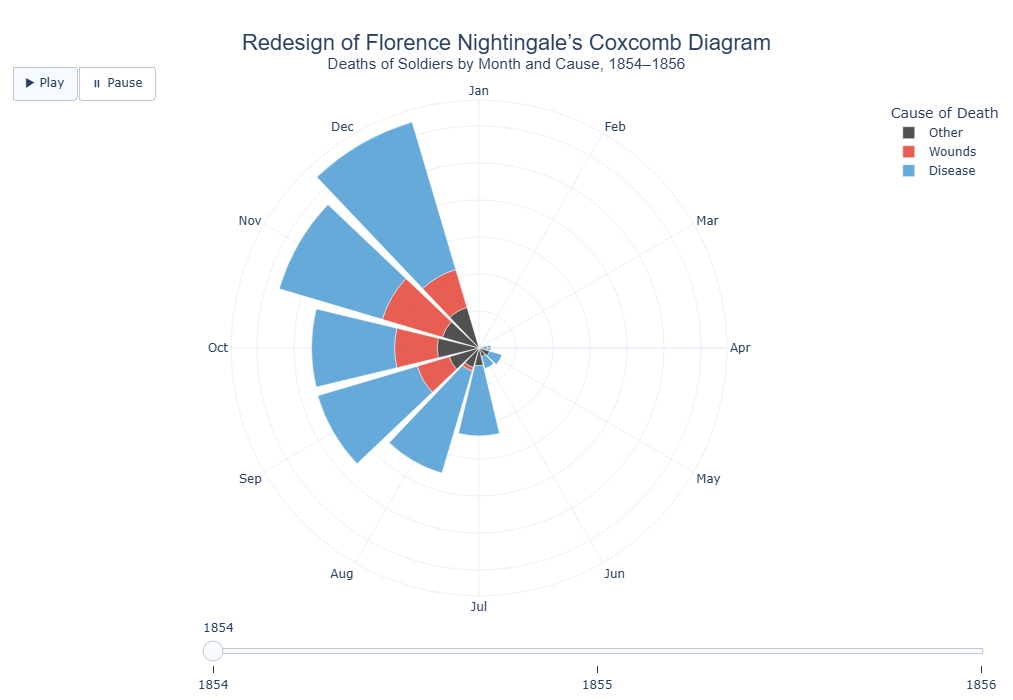

File saved as 'Nightingale_coxcomb_redesign_Mofoluwasho Kayode.html'


In [8]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

df = pd.read_csv("nightingale.csv")
df = df[['Month', 'Year', 'Disease', 'Wounds', 'Other']]

for cause in ["Disease", "Wounds", "Other"]:
    df[cause + "_radius"] = np.sqrt(df[cause])
    df[cause + "_deaths"] = df[cause] 

colors = {"Disease": "#4B9CD3", "Wounds": "#E34234", "Other": "#333333"}

fig = go.Figure()
years = sorted(df['Year'].unique())

for cause in ["Other", "Wounds", "Disease"]:  # Outer wedge last
    subset = df[df['Year'] == years[0]]
    fig.add_trace(go.Barpolar(
        r=subset[cause + "_radius"],
        theta=subset['Month'],
        name=cause,
        marker_color=colors[cause],
        opacity=0.85,
        customdata=np.stack(
            ([cause.capitalize()]*len(subset), subset[cause + "_deaths"]), axis=-1
        ),
        hovertemplate="%{theta}<br>%{customdata[0]}: %{customdata[1]} deaths<extra></extra>"
    ))

frames = []
for year in years:
    subset = df[df['Year'] == year]
    frame_data = []
    for cause in ["Other", "Wounds", "Disease"]:
        frame_data.append(go.Barpolar(
            r=subset[cause + "_radius"],
            theta=subset['Month'],
            marker_color=colors[cause],
            opacity=0.85,
            customdata=np.stack(
                ([cause.capitalize()]*len(subset), subset[cause + "_deaths"]), axis=-1
            ),
            hovertemplate="%{theta}<br>%{customdata[0]}: %{customdata[1]} deaths<extra></extra>"
        ))
    frame_annotations = [
        dict(
            text=str(year),
            x=0.5, y=0.5,
            xref="paper", yref="paper",
            showarrow=False,
            font=dict(size=60, color="gray"),
            opacity=0.15
        )
    ]
    frames.append(go.Frame(data=frame_data, name=str(year), layout=go.Layout(annotations=frame_annotations)))

fig.update(frames=frames)

fig.update_layout(
    title={
        "text": "Redesign of Florence Nightingale’s Coxcomb Diagram<br><sup>Deaths of Soldiers by Month and Cause, 1854–1856</sup>",
        "x":0.5, "xanchor":"center", "yanchor":"top", "font":dict(size=22, family="Arial, bold")
    },
    template="plotly_white",
    showlegend=True,
    legend_title_text="Cause of Death",
    polar=dict(
        radialaxis=dict(showticklabels=False, ticks=''),
        angularaxis=dict(
            direction="clockwise",
            rotation=90,
            categoryorder="array",
            categoryarray=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
        )
    ),
    updatemenus=[{
        "buttons":[
            {"args":[None, 
                     {"frame":{"duration":2000,"redraw":True},
                      "fromcurrent":True,
                      "transition":{"duration":800, "easing":"cubic-in-out"}}],
             "label":"▶ Play", "method":"animate"},
            {"args":[[None], 
                     {"frame":{"duration":0,"redraw":True}, 
                      "mode":"immediate","transition":{"duration":0}}],
             "label":"⏸ Pause", "method":"animate"}
        ],
        "direction":"left", "pad":{"r":10,"t":40}, "showactive":True, "type":"buttons",
        "x":0.1, "xanchor":"right", "y":1.15, "yanchor":"top"
    }],
    sliders=[{
        "steps":[
            {"args":[[str(year)], {"frame":{"duration":800,"redraw":True, "transition":{"duration":800, "easing":"cubic-in-out"}}, "mode":"immediate"}],
             "label":str(year), "method":"animate"} for year in years
        ],
        "x":0.15, "xanchor":"left", "y":0, "yanchor":"top"
    }],
    height=700
)


fig.show()
fig.write_html("Nightingale_coxcomb_redesign_Mofoluwasho Kayode.html", include_plotlyjs="cdn")

print("\033[1mFile saved as 'Nightingale_coxcomb_redesign_Mofoluwasho Kayode.html'\033[0m")




#### Interactive Displays
![1854 Disease, Wounds and Others](1854DiseaseWoundsOthers.png)
![1855 Disease, Wounds and Others](1855DiseaseWoundsOthers.png)
![1856 Disease, Wounds and Others](1856DiseaseWoundsOthers.png)
![1855 Disease](1855Disease.png)
![1855 Disease and Wounds](1855DiseaseWounds.png)
![1855 Disease and Others](1855DiseaseOthers.png)



